# CO543 - Image Processing
## Lab 04

- E/19/129
- K. H. Gunawardana


In [1]:
# import os
# from google.colab import drive

# path = "/content/drive/My Drive/ML/CO543/lab04/"

# # Mount Google Drive
# drive.mount('/content/drive')

In [1]:
# import modules
import cv2
import numpy as np
import pandas as pd
# %matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D

#### Using K-means algorithm Identify the different clusters of MNIST Handwritten Digits

In [2]:
# Load the dataset
path = "E:\\Education\\Academic\\3rd YEAR\\6th Sem\\CO543 Image Processing\\data\\lab04\\part01\\"

mnist = pd.read_csv(path + 'train.csv')

# Separate features and labels
X = mnist.drop('label', axis=1).values
y = mnist['label'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality with PCA to visualize in 2D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [6]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_param

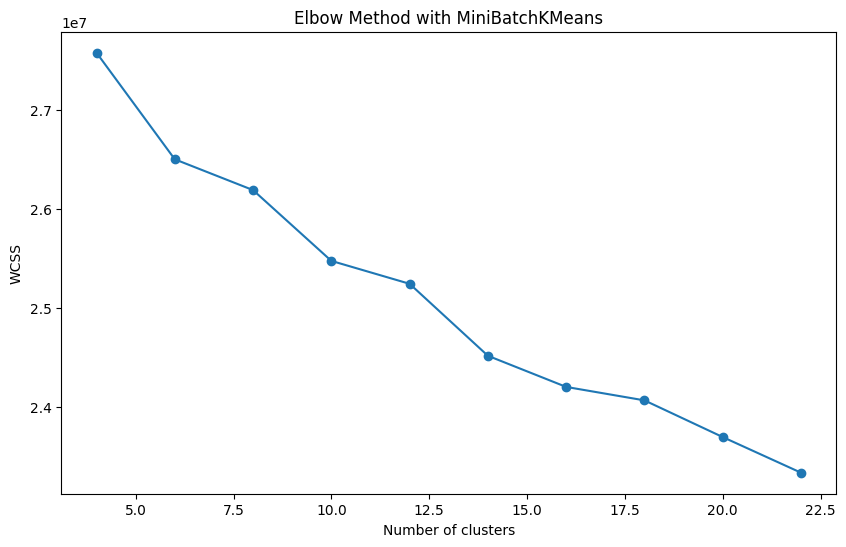

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_param

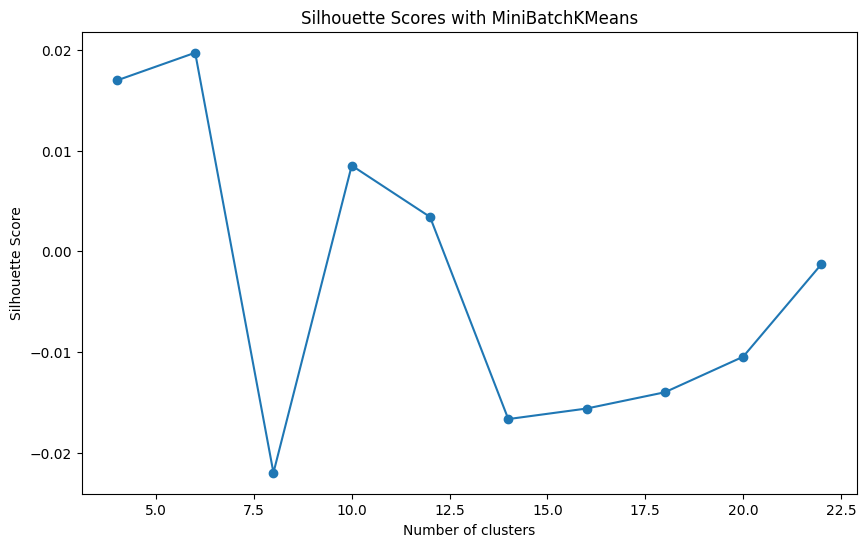

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Elbow Method with MiniBatchKMeans
wcss = []
for i in range(4, 24, 2):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=i, random_state=42)
    minibatch_kmeans.fit(X_scaled)
    wcss.append(minibatch_kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), wcss, marker='o')
plt.title('Elbow Method with MiniBatchKMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Method with MiniBatchKMeans
silhouette_scores = []
for i in range(4, 24, 2):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=i, random_state=42)
    minibatch_kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, minibatch_kmeans.labels_))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), silhouette_scores, marker='o')
plt.title('Silhouette Scores with MiniBatchKMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [10]:
# Applying K-Means with the chosen number of clusters
optimal_clusters = 10

# Initialize MiniBatchKMeans with desired number of clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model to your data
minibatch_kmeans.fit(X_scaled)

# Get cluster labels
y_kmeans = minibatch_kmeans.labels_
mnist['cluster'] = y_kmeans

f:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


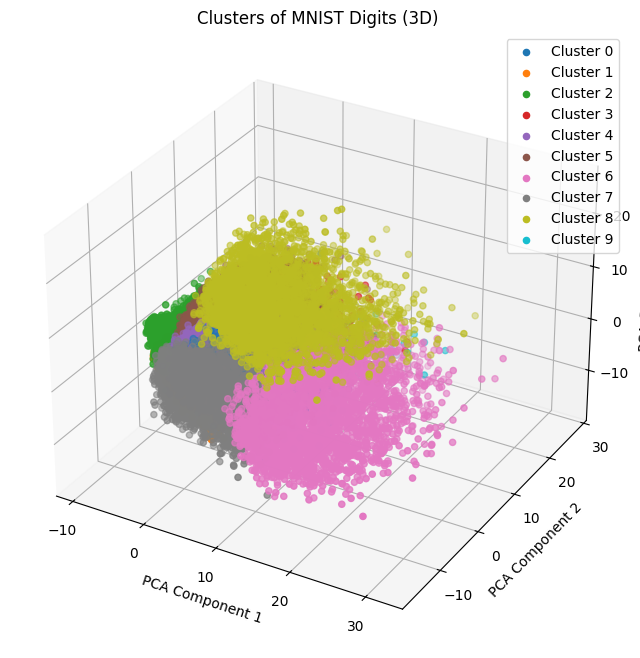

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(optimal_clusters):
    ax.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], X_pca[y_kmeans == i, 2], label=f'Cluster {i}')

ax.set_title('Clusters of MNIST Digits (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

# Enable interactivity for rotation
plt.show()

In [15]:
# Investigate misclustered images
misclustered_examples = []
error = []

for i in range(optimal_clusters):
    cluster_indices = np.where(y_kmeans == i)[0]
    true_labels = y[cluster_indices]
    most_common_label = np.bincount(true_labels).argmax()

    misclustered = cluster_indices[true_labels != most_common_label]
    if len(misclustered) > 0:
        misclustered_examples.append((i, misclustered, cluster_indices, most_common_label))

# Display misclustered images
for cluster, indices, cluster_indices, most_common_label in misclustered_examples:
    print(f"Cluster {cluster}: Number - {most_common_label} has misclustered images: {len(indices)} out of {len(cluster_indices)}")


Cluster 0: Number - 3 has misclustered images: 125 out of 435
Cluster 1: Number - 7 has misclustered images: 1944 out of 4269
Cluster 2: Number - 1 has misclustered images: 4137 out of 8672
Cluster 3: Number - 9 has misclustered images: 3695 out of 5830
Cluster 4: Number - 6 has misclustered images: 2919 out of 5502
Cluster 5: Number - 3 has misclustered images: 4246 out of 7011
Cluster 6: Number - 0 has misclustered images: 281 out of 2827
Cluster 7: Number - 8 has misclustered images: 2920 out of 4256
Cluster 8: Number - 2 has misclustered images: 1273 out of 3048
Cluster 9: Number - 7 has misclustered images: 69 out of 150


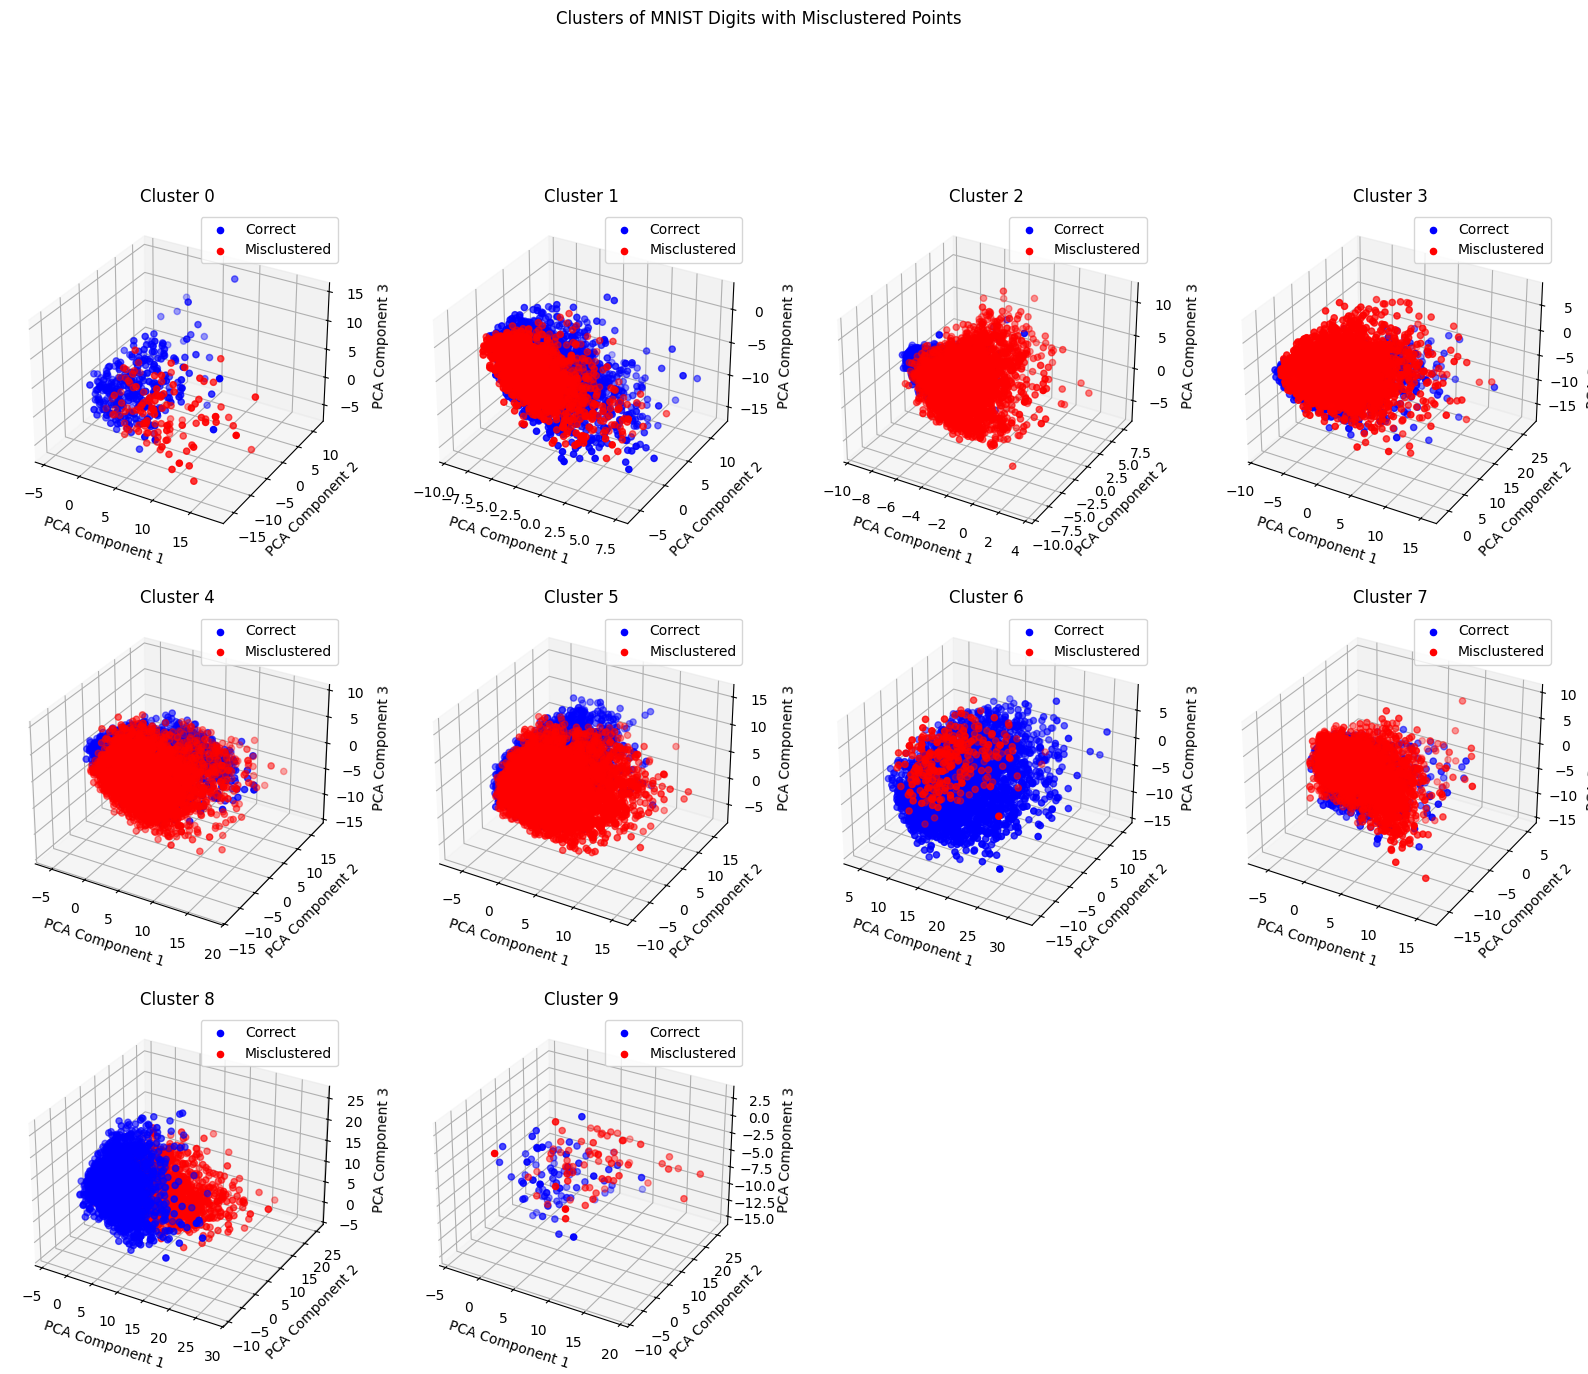

In [14]:
# Create subplots for each cluster
fig = plt.figure(figsize=(20, 20))
for i in range(optimal_clusters):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    
    # Get indices of data points belonging to the current cluster
    cluster_indices = np.where(y_kmeans == i)[0]
    
    # Filter true labels and PCA-reduced data points for the current cluster
    cluster_labels = y[cluster_indices]
    cluster_data = X_pca[cluster_indices]
    
    # Find the most common true label in the current cluster
    most_common_label = np.bincount(cluster_labels).argmax()
    
    # Separate correctly clustered and misclustered points
    correct_points = cluster_data[cluster_labels == most_common_label]
    misclustered_points = cluster_data[cluster_labels != most_common_label]
    
    # Plot correctly clustered points in blue and misclustered points in red
    ax.scatter(correct_points[:, 0], correct_points[:, 1], correct_points[:, 2], color='blue', label='Correct')
    ax.scatter(misclustered_points[:, 0], misclustered_points[:, 1], misclustered_points[:, 2], color='red', label='Misclustered')
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend()

plt.suptitle('Clusters of MNIST Digits with Misclustered Points')
plt.show()


### END